In [13]:
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as stats
import pylab
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Roboto']


col = ['#5052c7', '#1c84b3', '#0fb390', '#f09816', '#fb3856', '#41429f', '#166a8f', '#0b9072', '#c07a12', '#c92d45']

In [14]:
telco_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/telco-churn/train.csv')

In [15]:
def plot_LR(x):
    return 1/(1+np.exp(-x))

In [16]:
def predict_me(X, classifier, threshold):
    predictions = classifier.predict_proba(X)
    pred = [x < threshold for x in predictions]
    return np.array(pred)[:, 0]

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_region(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = col
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #Z = predict_me(np.array([xx1.ravel(), xx2.ravel()]).T, classifier, 0.5)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize = (10,10))
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl].iloc[:,0], 
                   y=X[y==cl].iloc[:,1],
                   alpha = 0.8, 
                   c = colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        
def plot_scatter_2d(df, x1, x2, y):
    f, ax = plt.subplots(1)
    for idx, cl in enumerate(np.unique(df[y])):
        
        ax.scatter(x=df[df[y]==cl][x1], 
                   y=df[df[y]==cl][x2],
                   c = col[idx],
                   label=cl)
        
    plt.show()

In [18]:
x = [np.random.normal() for i in range(500)]
y = [np.random.normal() for i in range(500)]
lab = [1 if w + np.random.normal()*0.5 >v else 0 for w,v in zip(x, y)]

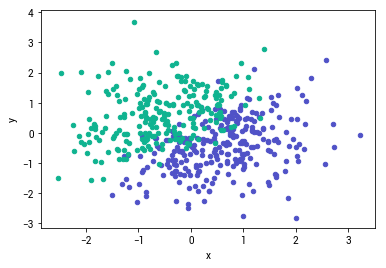

In [48]:
test_df = pd.DataFrame({'x': x, 'y':y, 'label':lab})

f, ax = plt.subplots(1)
test_df[test_df['label']==1].plot.scatter(x='x', y='y', ax = ax, color = col[0])
test_df[test_df['label']==0].plot.scatter(x='x', y='y', ax = ax, color = col[2])
test_df.to_csv('../datasets/logistic_sample.csv')

In [20]:
lr = LogisticRegression(fit_intercept=True)
lr.fit(test_df[['x','y']], test_df['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

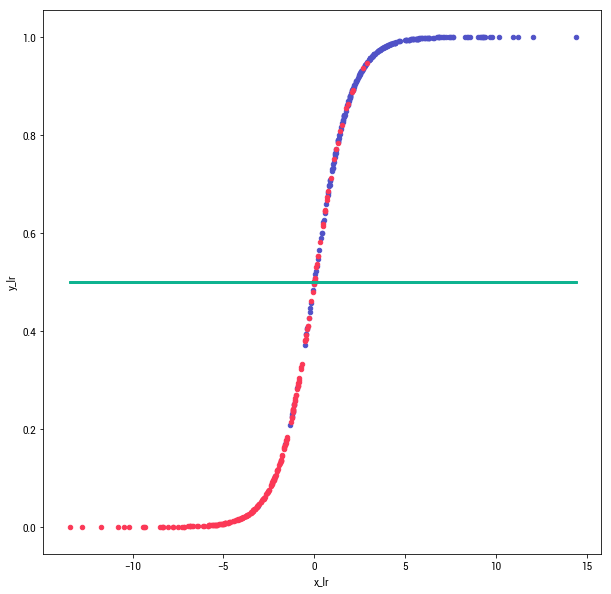

In [21]:
b0 = lr.intercept_[0]
b1 = lr.coef_[0][0]
b2 = lr.coef_[0][1]

test_df['y_lr'] = plot_LR(b0 + b1*test_df['x'] + b2*test_df['y'])
test_df['x_lr'] = b0 + b1*test_df['x'] + b2*test_df['y']

f, ax = plt.subplots(1, figsize = (10,10))
test_df[test_df['label']==1].plot.scatter(x='x_lr', y='y_lr', ax = ax, color = col[0])
test_df[test_df['label']==0].plot.scatter(x='x_lr', y='y_lr', ax = ax, color = col[4])
pylab.plot(test_df['x_lr'], [0.5]*500 , color = col[2], lw = 3)

## SAMPLE DATA

Text(0.5,0,'Years out of college')

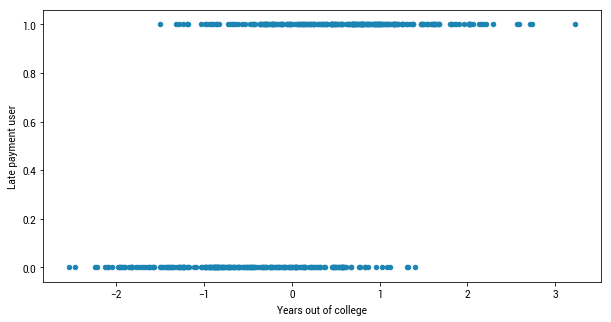

In [22]:
f, ax = plt.subplots(1, figsize = (10,5))
test_df.plot.scatter(x='x', y='label', ax = ax, color = col[1])
plt.ylabel('Late payment user')
plt.xlabel('Years out of college')

(-0.5, 1.5)

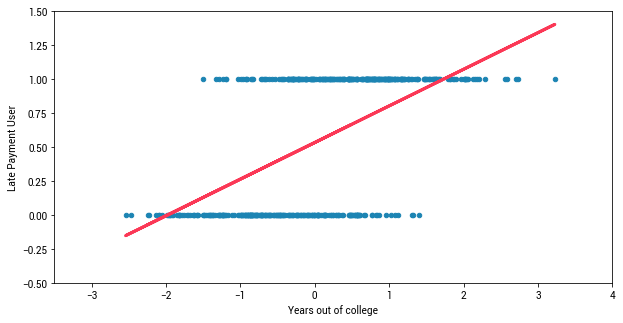

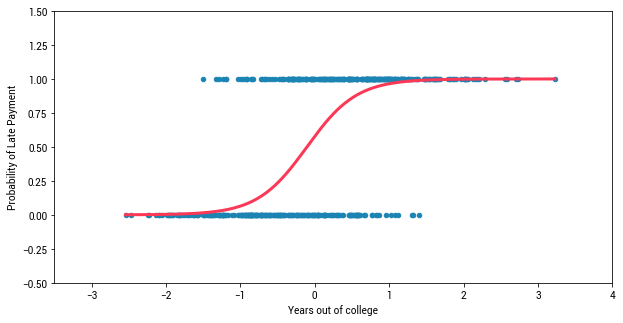

In [31]:

lr1 = LinearRegression(fit_intercept=True)
lr1.fit(test_df[['x', 'y']], test_df['label'])

lr = LogisticRegression(fit_intercept=True)
lr.fit(test_df[['x', 'y']], test_df['label'])

b0 = lr.intercept_[0]
b1 = lr.coef_[0][0]

b0_1 = lr1.intercept_
b1_1 = lr1.coef_[0]

test_df['y_lr'] = plot_LR(b0 + b1*test_df['x'] )
test_df['x_lr'] = b0 + b1*test_df['x'] 

f, ax = plt.subplots(1, figsize = (10,5))

test_df.plot.scatter(x='x', y='label', ax = ax, color = col[1])
pylab.plot(test_df['x'], test_df['x']*b1_1 + b0_1, color = col[4], lw = 3)
ax.set_xlim([-3.5,4])
ax.set_ylim([-0.5, 1.5])
plt.ylabel('Late Payment User')
plt.xlabel('Years out of college')

f, ax = plt.subplots(1, figsize = (10,5))
test_df.plot.scatter(x='x', y='label', ax = ax, color = col[1])
pylab.plot(test_df['x'].sort_values(), plot_LR(test_df['x_lr'].sort_values()), color = col[4], lw = 3)
ax.set_xlim([-3.5,4])
plt.ylabel('Probability of Late Payment')
plt.xlabel('Years out of college')
ax.set_ylim([-0.5, 1.5])


### Titanic Dataset

In [45]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/titanic/train.csv')
titanic_df.Sex = titanic_df.Sex.apply(lambda x: x=='male')
titanic_df = titanic_df.dropna()

In [47]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",True,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",False,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",False,58.0,0,0,113783,26.5500,C103,S


In [32]:
par_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/Analytics%20Edge/Parole.csv')
par_df = pd.concat([par_df.drop('State', axis = 1), pd.get_dummies(par_df['State'])], axis = 1)
par_df = pd.concat([par_df.drop('Crime', axis = 1), pd.get_dummies(par_df['Crime'])], axis = 1)
par_df.head()

,Male,RaceWhite,Age,TimeServed,MaxSentence,MultipleOffenses,Violator,Kentucky,Louisiana,Other,Virginia,Driving,Drugs,Larceny,Other
0,1,1,33.2,5.5,18,0,0,0,0,1,0,1,0,0,0
1,0,1,39.7,5.4,12,0,0,0,0,1,0,0,1,0,0
2,1,0,29.5,5.6,12,0,0,0,0,1,0,0,1,0,0
3,1,1,22.4,5.7,18,0,0,0,0,1,0,0,0,0,1
4,1,0,21.6,5.4,12,0,0,0,0,1,0,0,0,0,1


In [33]:
parole_mod = LogisticRegression(fit_intercept=True)
parole_mod.fit(par_df[['Age', 'TimeServed']], par_df['Violator'])
predictions = parole_mod.predict(par_df[['Age', 'TimeServed']])
accuracy = [z == v for z, v in zip(predictions, par_df['Violator'])]
sum(accuracy)/len(accuracy)

0.88444444444444448

In [34]:
parole_mod.coef_

array([[-0.00283067, -0.25908284]])

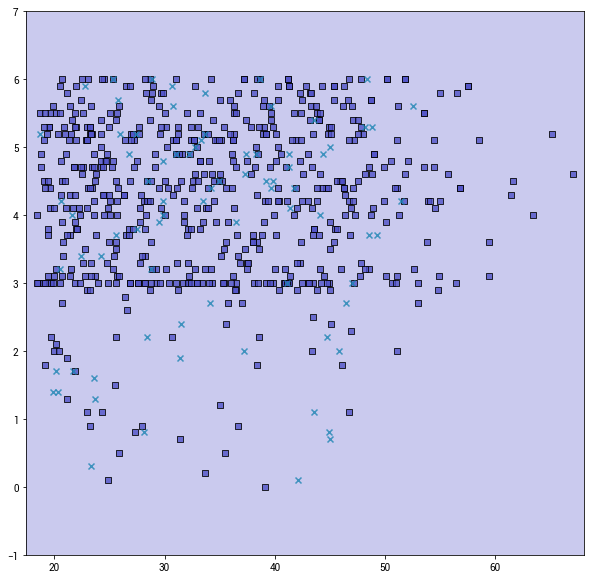

In [35]:
plot_decision_region(par_df[['Age', 'TimeServed']], par_df['Violator'], parole_mod)

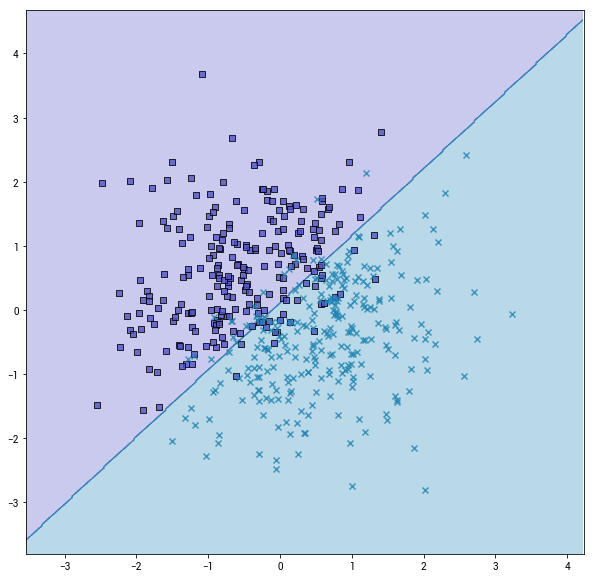

In [36]:
plot_decision_region(test_df[['x', 'y']], test_df['label'], lr)

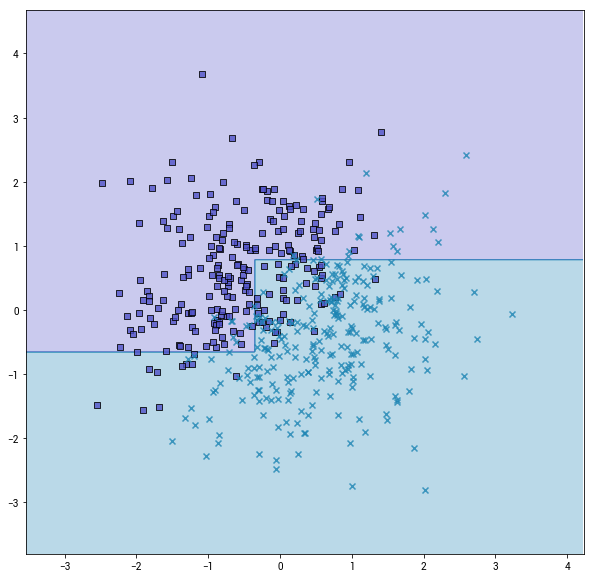

In [37]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4)
tree.fit(test_df[['x','y']], test_df['label'])
plot_decision_region(test_df[['x', 'y']], test_df['label'], tree)

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

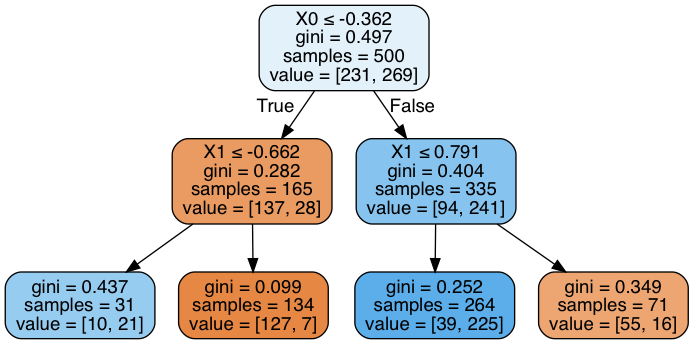

In [39]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [40]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/titanic/train.csv')
titanic_df.Sex = titanic_df.Sex.apply(lambda x: x=='male')
titanic_df = titanic_df.dropna()

In [41]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",True,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",False,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",False,58.0,0,0,113783,26.5500,C103,S


In [42]:
def plot_scatter(X, y):
    
    f, ax = plt.subplots(1, figsize = (10,10))
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl].iloc[:,0], 
                   y=X[y==cl].iloc[:,1], 
                   color = col[idx])   

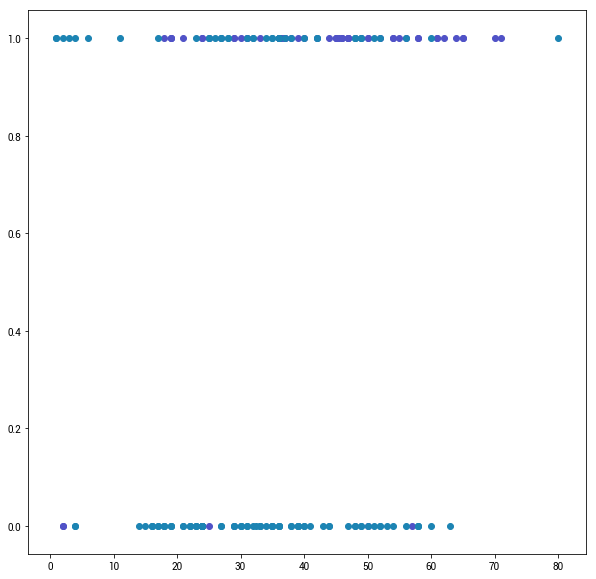

In [43]:
plot_scatter(titanic_df[['Age', 'Sex']], titanic_df['Survived'])

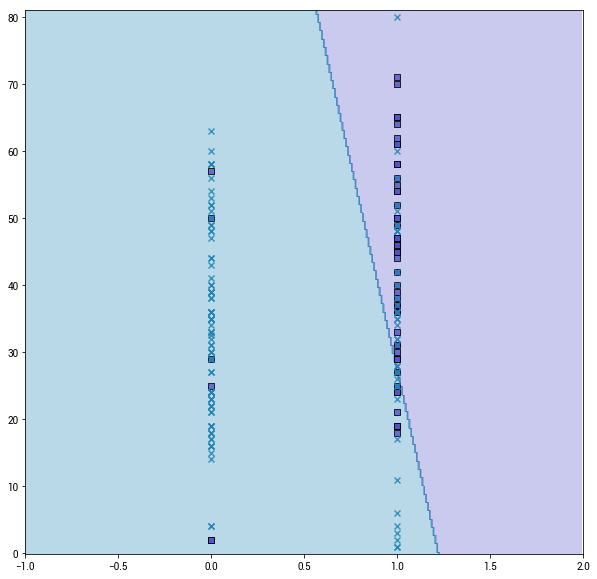

In [44]:
from sklearn.linear_model import LogisticRegression

x1 = 'Sex'
x2 = 'Age'
lr = LogisticRegression()
lr.fit(titanic_df[[x1, x2]], titanic_df['Survived'])

plot_decision_region(titanic_df[[x1, x2]], titanic_df['Survived'], lr, resolution = 0.01)

In [81]:
parole_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/Analytics%20Edge/Parole.csv')

In [83]:
parole_df.head()

,Male,RaceWhite,Age,State,TimeServed,MaxSentence,MultipleOffenses,Crime,Violator
0,1,1,33.2,Other,5.5,18,0,Driving,0
1,0,1,39.7,Other,5.4,12,0,Drugs,0
2,1,0,29.5,Other,5.6,12,0,Drugs,0
3,1,1,22.4,Other,5.7,18,0,Other,0
4,1,0,21.6,Other,5.4,12,0,Other,0


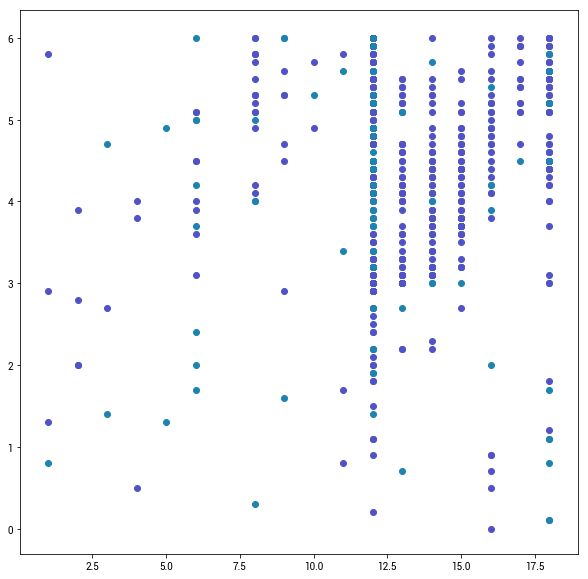

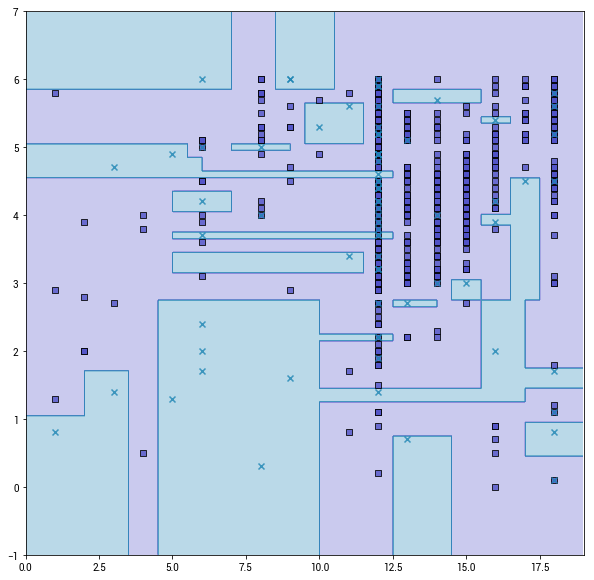

In [89]:
plot_scatter(parole_df[['MaxSentence', 'TimeServed']], parole_df['Violator'])

from sklearn.linear_model import LogisticRegression

x1 = 'MaxSentence'
x2 = 'TimeServed'
lr = DecisionTreeClassifier()
lr.fit(parole_df[[x1, x2]], parole_df['Violator'])

plot_decision_region(parole_df[[x1, x2]], parole_df['Violator'], lr)